<a href="https://colab.research.google.com/github/alihussainia/Keras-Models/blob/master/Imdb_ANN_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTS**

In [0]:
import tensorflow as tf
!pip3 install keras
from keras.datasets import imdb   
import numpy as np
from keras import models
from keras import layers
from keras.layers import Dropout
from keras import losses
from keras import metrics
from keras import optimizers
import matplotlib.pyplot as plt

** Loading the IMDB dataset**

In [0]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

**Visualizing training data and labels**

In [0]:
train_data[0]

In [4]:
train_labels[0]

1

**Checking the length of the training data  (via index)**

In [5]:
 max([max(sequence) for sequence in train_data])

9999

**integer sequences back into sentences (still need clearification)**

In [0]:
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

**integer sequences into a binary matrix (Data Vectorization)**

In [0]:
def vectorize_sequences(sequences, dimension=10000):
 # Create an all-zero matrix of shape (len(sequences), dimension)
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1. # set specific indices of results[i] to 1s
    return results
# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

*** encoded sample***

In [8]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

** Encoding the labels(label's vectorization)**

In [0]:
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

**Defining the MODEL**

In [0]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

**defining optimizer, loss function and metrices**

In [0]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
 loss=losses.binary_crossentropy,
 metrics=[metrics.binary_accuracy])

**defining the validation set**

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training the model**

In [14]:
history = model.fit(partial_x_train,
 partial_y_train,
 epochs=20,
 batch_size=512,
 validation_data=(x_val, y_val))                   

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 167us/step - loss: 0.6932 - acc: 0.4982 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 2/20
15000/15000 [==============================] - 2s 131us/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 3/20
15000/15000 [==============================] - 2s 131us/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 4/20
15000/15000 [==============================] - 2s 132us/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 5/20
15000/15000 [==============================] - 2s 132us/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4947
Epoch 6/20
15000/15000 [==============================] - 2s 132us/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6933 - val_acc: 0.4947
Epoch 7/20
15000/15000 [==============================] - 2s 131us/step - loss: 0.6931 - acc: 0.5035 - val_loss: 0.6932 - 

**The *history* dictionary**

In [15]:
history_dict = history.history
history_dict.keys()
[u'acc', u'loss', u'val_acc', u'val_loss']

['acc', 'loss', 'val_acc', 'val_loss']

**Plotting the training and validation loss**

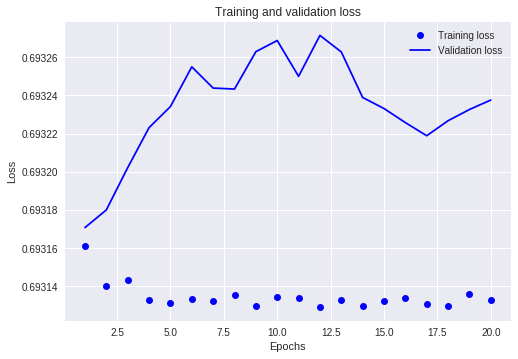

In [16]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

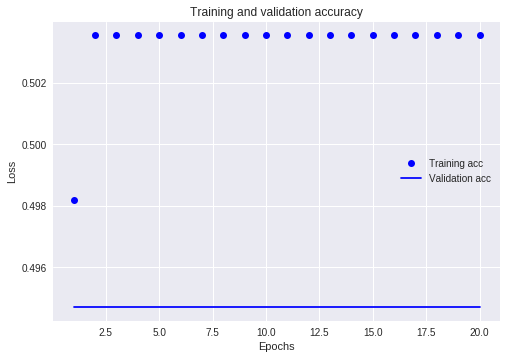

In [17]:
plt.clf() # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Re-training the model**

In [18]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
 loss='binary_crossentropy',
 metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 97us/step - loss: 0.6932 - acc: 0.4991
Epoch 2/4
25000/25000 [==============================] - 2s 92us/step - loss: 0.6932 - acc: 0.4961
Epoch 3/4
25000/25000 [==============================] - 2s 91us/step - loss: 0.6932 - acc: 0.4997
Epoch 4/4
25000/25000 [==============================] - 2s 69us/step


***final results***

In [19]:
 results

[0.6931479242897034, 0.49996]

**Generating predictions for new data**

In [41]:
model.predict(x_test)

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

# UPDATED MODEL

**Changes**

---

*  ** use of *tanh* as activation function**
*   ** use of *softmax* as activation function in the output layer**
*  ** use of *Dropout layer at 0.2 dropping probability* **
*  ** use of *increased hidden layers* **
*  ** use of *SGD* as optimizer**
*  ** use of *tanh* as activation function**
*  ** use of *mse* as loss function**





In [0]:
model_new = models.Sequential()
model_new.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model_new.add(layers.Dropout(0.2))
model_new.add(layers.Dense(32, activation='tanh'))
model_new.add(layers.Dropout(0.2))
model_new.add(layers.Dense(128, activation='tanh'))
model_new.add(layers.Dense(1, activation='softmax'))

In [0]:
model_new.compile(optimizer=optimizers.SGD(lr=0.001),
 loss=losses.mse,
 metrics=[metrics.binary_accuracy])

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [36]:
history = model_new.fit(partial_x_train,
 partial_y_train,
 epochs=20,
 batch_size=512,
 validation_data=(x_val, y_val))  

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 180us/step - loss: 0.5035 - binary_accuracy: 0.4965 - val_loss: 0.4947 - val_binary_accuracy: 0.5053
Epoch 2/20
15000/15000 [==============================] - 2s 132us/step - loss: 0.5035 - binary_accuracy: 0.4965 - val_loss: 0.4947 - val_binary_accuracy: 0.5053
Epoch 3/20
15000/15000 [==============================] - 2s 131us/step - loss: 0.5035 - binary_accuracy: 0.4965 - val_loss: 0.4947 - val_binary_accuracy: 0.5053
Epoch 4/20
15000/15000 [==============================] - 2s 130us/step - loss: 0.5035 - binary_accuracy: 0.4965 - val_loss: 0.4947 - val_binary_accuracy: 0.5053
Epoch 5/20
15000/15000 [==============================] - 2s 130us/step - loss: 0.5035 - binary_accuracy: 0.4965 - val_loss: 0.4947 - val_binary_accuracy: 0.5053
Epoch 6/20
15000/15000 [==============================] - 2s 130us/step - loss: 0.5035 - binary_accuracy: 0.4965 - val_loss: 0.4947 - val_bi

In [42]:
model_new.predict(x_test)

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)